<a href="https://colab.research.google.com/github/Afroza2/Strativ-AB-Travel-Management/blob/main/Dhaka_Weather_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Checking the python version**

In [2]:
!python3 --version

Python 3.10.12


# Installing some packages

In [1]:
!pip install openmeteo_requests
!pip install pandas
!pip install requests_cache
!pip install retry_requests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 7.0 MB/s eta 0:00:00


# Fetching Dhaka weather data from 1940 and saving the data in a dataframe

In [17]:
import openmeteo_requests
import requests_cache
import pandas as pd
from retry_requests import retry

cache_session = requests_cache.CachedSession('.cache', expire_after = 3600)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)


url = "https://archive-api.open-meteo.com/v1/archive"

params = {
            "latitude": 23.8103,  # Dhaka latitude
            "longitude": 90.4125,  # Dhaka longitude
            "start_date": "1940-01-01",
            "end_date": "2023-11-10",
            "hourly": "temperature_2m"
        }
responses = openmeteo.weather_api(url, params=params)

response = responses[0]
print(f"Coordinates {response.Latitude()}°E {response.Longitude()}°N")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()

if hourly_temperature_2m.size == 0:
    print("No temperature data available for the specified date range.")
else:
    hourly_data = {"date": pd.date_range(
    start = pd.to_datetime(hourly.Time(), unit = "s"),
    end = pd.to_datetime(hourly.TimeEnd(), unit = "s"),
    freq = pd.Timedelta(seconds = hourly.Interval()),
    inclusive = "left"
            )}
    hourly_data["temperature_2m"] = hourly_temperature_2m

    df = pd.DataFrame(data = hourly_data)

if df['temperature_2m'].isnull().values.any():
    print("Null values found in temperature data. Replacing with appropriate value.")

    df['temperature_2m'].fillna(method='ffill', inplace=True)

    print(df)


    # df.to_csv('weather_data.csv', index=False)








Coordinates 23.796133041381836°E 90.38054656982422°N
Elevation 19.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
Null values found in temperature data. Replacing with appropriate value.
                      date  temperature_2m
0      1940-01-01 00:00:00       14.178500
1      1940-01-01 01:00:00       14.778501
2      1940-01-01 02:00:00       16.078499
3      1940-01-01 03:00:00       19.978498
4      1940-01-01 04:00:00       23.078499
...                    ...             ...
735115 2023-11-10 19:00:00       18.598000
735116 2023-11-10 20:00:00       18.598000
735117 2023-11-10 21:00:00       18.598000
735118 2023-11-10 22:00:00       18.598000
735119 2023-11-10 23:00:00       18.598000

[735120 rows x 2 columns]


# Checking the dataframe and its distribution

In [18]:
df.head(100)

,date,temperature_2m
0,1940-01-01 00:00:00,14.178500
1,1940-01-01 01:00:00,14.778501
2,1940-01-01 02:00:00,16.078499
3,1940-01-01 03:00:00,19.978498
4,1940-01-01 04:00:00,23.078499
...,...,...
95,1940-01-04 23:00:00,11.928500
96,1940-01-05 00:00:00,11.428500
97,1940-01-05 01:00:00,11.378500
98,1940-01-05 02:00:00,15.028501


# Check null values in the dataframe

In [19]:
null_counts = df.isnull().sum()

# Print or use the result as needed
print(null_counts)

date              0
temperature_2m    0
dtype: int64


# Describe the dataframe

In [20]:
df.describe()

,temperature_2m
count,735120.000000
mean,25.125923
std,4.872819
min,7.448000
25%,22.648001
50%,25.997999
75%,28.247999
max,42.448002


In [22]:
df.shape

(735120, 2)

In [21]:
df.dtypes

date              datetime64[ns]
temperature_2m           float32
dtype: object

# Ploting the dataframe

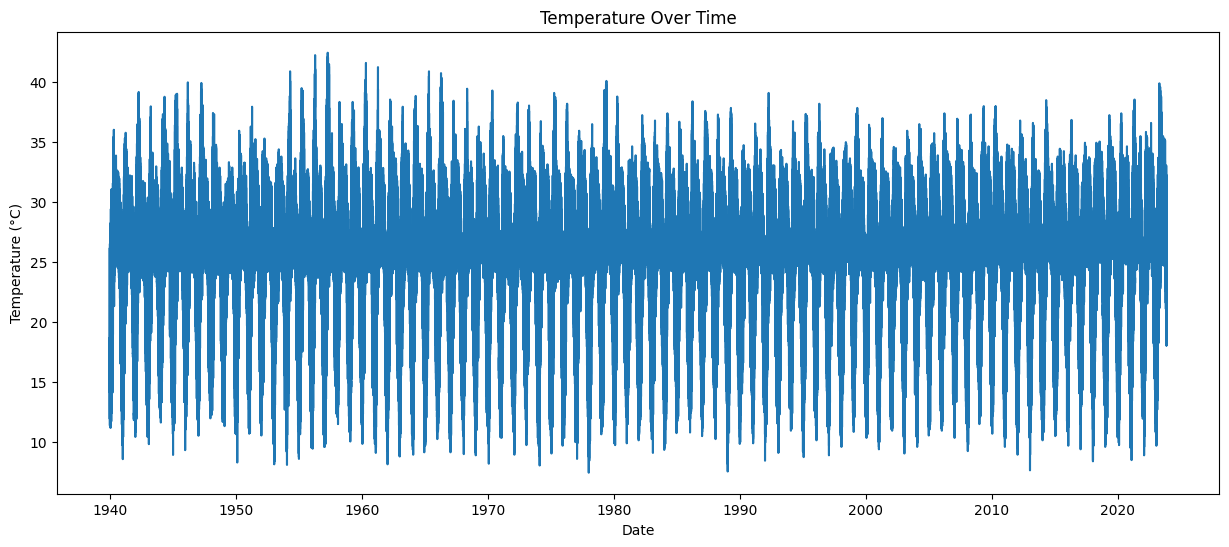

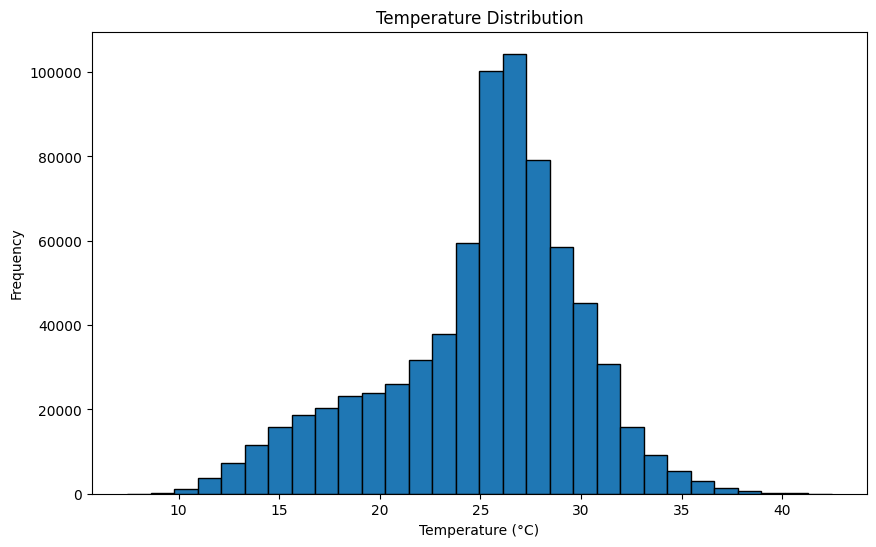

In [7]:
import matplotlib.pyplot as plt

df.set_index('date', inplace=True)

# Plot the time series data
plt.figure(figsize=(15, 6))
plt.plot(df['temperature_2m'])
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

# Plot a histogram of temperature values
plt.figure(figsize=(10, 6))
plt.hist(df['temperature_2m'], bins=30, edgecolor='black')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()


In [23]:
df


,date,temperature_2m
0,1940-01-01 00:00:00,14.178500
1,1940-01-01 01:00:00,14.778501
2,1940-01-01 02:00:00,16.078499
3,1940-01-01 03:00:00,19.978498
4,1940-01-01 04:00:00,23.078499
...,...,...
735115,2023-11-10 19:00:00,18.598000
735116,2023-11-10 20:00:00,18.598000
735117,2023-11-10 21:00:00,18.598000
735118,2023-11-10 22:00:00,18.598000


# Line Plot for Last 10 years

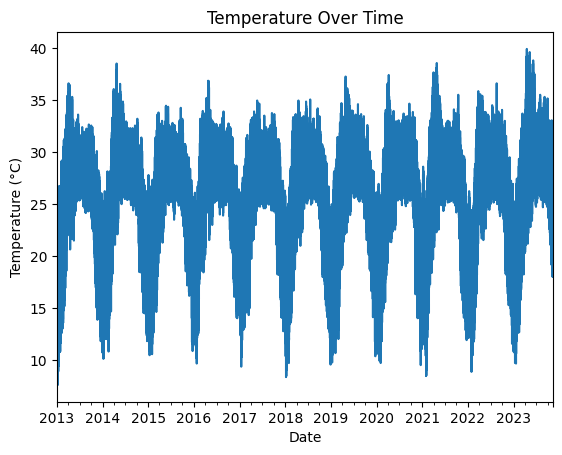

In [9]:
import matplotlib.pyplot as plt


# Plotting
df.loc['2013-01-01':].plot(y='temperature_2m', kind='line', legend=False)
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

# print(df.loc['2013-01-01':])

In [24]:
df.dtypes

date              datetime64[ns]
temperature_2m           float32
dtype: object

In [25]:

!pip install prophet

In [ ]:
import matplotlib.pyplot as plt
from prophet import Prophet

print("Original DataFrame columns:", df.columns)

# Rename columns to match Prophet's requirements
df = df.rename({'date': 'ds', 'temperature_2m': 'y'}, axis=1)

# Check the column names after renaming
print("DataFrame columns after renaming:", df.columns)
# Model fit
m = Prophet()
m.fit(df)

# Predict
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

# Plot results
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)
plt.show()
forecast


Original DataFrame columns: Index(['ds', 'y'], dtype='object')
DataFrame columns after renaming: Index(['ds', 'y'], dtype='object')


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_ntpr5_2/gxjteb34.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_ntpr5_2/2lfelv3n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7007', 'data', 'file=/tmp/tmp_ntpr5_2/gxjteb34.json', 'init=/tmp/tmp_ntpr5_2/2lfelv3n.json', 'output', 'file=/tmp/tmp_ntpr5_2/prophet_modelspdsk3yt/prophet_model-20231111162339.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:23:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:30:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
